# [IAPR][iapr]: Project


**Group ID:** 10

**Author 1 (sciper):** Maxime Gardoni (271088)  
**Author 2 (sciper):** Marcel Dubach (263557)  
**Author 3 (sciper):** Lorenzo Panchetti (258754)   

**Release date:** 07.05.2021  
**Due date:** 03.06.2021 (23h59) 


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

An anonymous researcher that we will name Lann Yecun is convinced that the MNIST dataset still has great potential. He decides to create a playing card game based on MNIST digits and different figures. The game uses a standard 52 card deck which is composed of four French suits/colours: clubs (&#9827;), diamonds (&#9830;), hearts (&#9829;) and spades (&#9824;). Each suit includes 10 digit cards (from 0 to 9) and 3 figures (Jack-J, Queen-Q, and King-K). Here is an example of the 13 spade cards with their name.


<img src="media/example_cards.png">


We can find the same arrangement of cards for the clubs, diamonds, and hearts. 


## 1. Rules


### 1.1 Standard

The rules are based on the simple battle card game. The goal of the game is to win as many points as possible. Each turn, the 4 players play a card in front of them. As displayed in the example below. The rules are the following:

- The cards are ranked in the following order : **0 < 1 < 2 < 3 < 4 < 5 < 6 < 7 < 8 < 9 < J < Q < K**.
- The player with the highest-ranked card wins the round and obtains **1 point**. 
- If the highest-ranked card is the same for multiple players we call it a draw and all winners get **1 points**. 
- In this configuration, we **do not** take into account the suits. The game only rely on the card ranks. 
- The game lasts 13 rounds. After the last round, the winner is the player that has the largest number of points. 
- In the example below Player 1 wins the round with his Queen ( 0 < 8 < J < **Q**).

If two or more players have the same number of points they share the victory.

### 1.2 Advanced

The advanced rules take into account the suits. 

- At the beginning of **each round** a random player is designated as the **dealer**. The dealer places a green token with the letter *D* next to him (player 1 in the example below).
- Only the cards that belong to the same suit as the one of the dealer are considered valid. In the example below, only Player 4 is competing with Player 1 as spade was selected by the dealer (e.i., Player 1). Player 2 and 3 are out for this round. Player 1 wins the round and **1 point** with the Queen ( 0&#9824; < **Q&#9824;**).
- There cannot be any draw between the players as they are not any card duplicates.
- We use the same system as the standard method to count the points.


### 1.3 Notes

- The orientation of the card is linked to the position of the player around the table. For instance, to read the card of the 3rd player you will have to rotate it by 180°.
- The **digits** always **face** the players around the table. The figures can have random orientations.
- Player 1 **always** seats south of the table. The players are **always** ordered counter-clockwise as in the example. 
- The dealers can change between the rounds and games.
- Some cards might apear multiple times per game.

<img src="media/example_round.jpg">



---
## 2. Data

You will be given the images of 7 games that were played ([download link](https://drive.google.com/file/d/1lsCMEwc00nsBMVrzo0NE1np79dMeShqZ/view?usp=sharing)). The data are composed of:
   - 7 folder named after the games (game1 to game7).
   - Each game includes 13 ordered images (1st to 13th round).
   - Each game includes a csv file with the ground truth of the game. The first row list the players (P1 to P4) as well as the dealer (D). The following rows represent the rounds (1 to 13). We represent the card played with 2 character as $AB$ where $A \in [0-9, J, Q, K]$ is the rank of the card and $B \in [C, D, H, S]$ is the suit. For example, QS means "(Q)ueen of (S)pade". The dealer is represented by the ID of the player (e.g. P1 -> 1).
   
You are free to use external datasets such as the original MNIST train set that you used in lab 3.

---
## 3. Your Tasks

Your task is to ready yourself for the final evaluation. The day of the exam we will give you a new folder with a new game. ! The digits on the cards might sligthly **differ** from the one of the traning set. When given a new data folder with 13 images your should be able to:

**Task 0**
   - Plot an overlayF fr each round image that shows your detections and classification. You can for example plot bounding boxes around the cards/dealer token and add a text overlay with the name of the classes.

**Task 1**
   - (a) Predict the **rank** of the card played by each player at each round (Standard rules).
   - (b) Predict the **number of points** of each player according to **Standard** rules
 
**Task 2**
   - (a) Detect which player is the selected **dealer** for each round.
   - (b) Predict the **rank** and the **suit** of the card played by each player at each round (Advanced rules).
   - (c) Predict the **number of points** of each player according to **Advanced** rules


You will have to upload your code on moodle **the day before** the exam.

We will ask you to run your pipeline in realtime and to send us your prediction of task 1 and 2 obtain with the function **print_results**. On our side we will compute the perfomance of your classification algorithm. To evaluate your method we will use the **evaluate_game** function presented below. To understant how the provided functions work please read the documentation of the functions in **utils.py**.

**Please make sure your function returns the proper data format to avoid points penalty the day of the exam**. 

## Imports

In [1]:
"""
! python -m pip install -U scikit-image
! pip install opencv-python
! pip install imutils
! apt update
! apt install -y libgl1-mesa-glx
"""

import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import skimage.filters as fl
from skimage import exposure as ex 
from skimage.transform import rescale, resize
from skimage.morphology import disk
import numpy as np
import pickle
import cv2
import imutils
import cv2 as cv
from numpy.linalg import eig
from skimage.transform import rotate
from skimage import measure, img_as_float
from scipy.stats import multivariate_normal
import matplotlib.patches as mpatches
import matplotlib.colors as cl
from skimage import filters as fl 
from skimage.filters import threshold_otsu
import matplotlib.patches as pat

import pandas as pd
from utils import print_results
from utils import evaluate_game

from labelLoader import Loader
import torch
from lenet5_like import LeNet5_like
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

### 1.1 Preprocessing 

## Functions

In [7]:
def load(path, game_id, do_reload = False, do_save = True):
    #input: game (int), do_reload (reload the images from source), do save (store the REDUCED generated dataset)
    scaling = 4
    
    game_path = os.path.join(path, "game"+str(game_id))
    print("Loading ", game_path, " ...")
    img_filenames = [nm for nm in os.listdir(game_path) if '.jpg' in nm]  # make sure to only load .jpg
    img_filenames.sort()  # sort .jpg filenames
    
    file_name = "train_games_resized/"+str(game_id) + ".pkl"
    if do_reload and os.path.isfile(file_name):
        print(f"Loading resized games from saved .pkl at {file_name}")
        with open(file_name, 'rb') as f:
            game_resized = pickle.load(f)
            return game_resized
    else:
        # dont reload from .pkl. 
        # create image collection
        ic = skimage.io.imread_collection([os.path.join(game_path, img_name) for img_name in img_filenames])

        # concatenate all images
        game = skimage.io.concatenate_images(ic)

        # initialize array for reduced frames
        game_resized = np.empty((game.shape[0], game.shape[1] // scaling, game.shape[2] // scaling, game.shape[3]), dtype=np.uint8)

        for i in range(game.shape[0]):
            img = game[i]
            game_resized[i] = resize(img, (img.shape[0]//scaling, img.shape[1]//scaling), anti_aliasing=True, preserve_range = True)

        if do_save:
            print("Saving images as .pkl")
            file_name = "train_games_resized/"+str(game_id)+".pkl"
            out_file = open(file_name, 'wb')
            pickle.dump(game_resized, out_file)
            out_file.close()

        return game_resized

def flood(img):
    """
    region growing from 0,0
    """
    img_floodfill = img.copy()

    # img used to flood filling.
    # Notice the size needs to be 2 pixels than the image.
    h, w = img.shape[:2]
    imgF = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(img_floodfill, imgF, (0,0), 255);

    # Invert floodfilled image
    img_floodfill_inv = cv2.bitwise_not(img_floodfill)

    # Combine the two images to get the foreground.
    img_floodfill = img | img_floodfill_inv
    return img_floodfill


def hue_selection(img):
    """
    transform to hsv colorspace, select a tone of green, apply a close, return the original
    and closed mask
    """
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    
    #plt.figure()
    ## TODO: Define the color selection boundaries in RGB values
    # play around with these values until you isolate the green
    #lower_green = np.array([40,100,20]) 
    lower_green = np.array([40,45,20]) 

    upper_green = np.array([88,255,255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, skimage.morphology.square(10))

    return mask, mask_closed

def sanity_check(labeled_mask):
    """
    check the labeled mask, if there are 5 region exactly, and if they are of appropriate size
    """
    props = skimage.measure.regionprops(labeled_mask)
    areas= np.zeros((len(props)))
    legend="size of areas"
    
    for i, p in enumerate(props):
        legend= legend +" / " + str(p.area)
        areas[i]= p.area
    
    BALL_SIZE=18000 # 
    CARD_SIZE = 24000
    TOL=2000
    if (len(areas)==4    
        and np.sum(np.logical_and(CARD_SIZE-TOL<areas, areas<CARD_SIZE+TOL))==4):

        legend= legend +" \n | status = good"
        sanity_status=True
        
    else:
        legend= legend +" \n | status = bad"
        
        sanity_status=False

    return sanity_status, legend

def convexify(mask_dilated, np_shape=4):
    """
    get the five biggest region, for each region we compute the convex hull
    we return a fresh canva with these 5 convex hull drawn on it
    """
    labeled_mask = skimage.measure.label(mask_dilated)
    props = skimage.measure.regionprops(labeled_mask)
    
    five_biggest_label=[]
    for p in sorted(
            props,
            key=lambda r: r.area,
            reverse=True):  #get the region by order 

        five_biggest_label.append(p.label)
        #print(p.area)
        if len(five_biggest_label)==np_shape: # we got the five biggest !
            #print(five_biggest_label)
            break
 
    processed_mask = np.zeros_like(labeled_mask)
    for i, lab in enumerate(five_biggest_label):
        temp=np.zeros_like(labeled_mask)
        temp[labeled_mask==lab]=1
        temp= skimage.morphology.convex_hull_image(temp)
        
        #plt.figure()
        #plt.imshow(temp)
        processed_mask[temp==1]=1 # set it as foreground
    return processed_mask


def heavy_dilate_on_small_only(labeled_mask_1, mask, size):
    """
    select only small region (smaller than constant)
    dilation 
    convexifying
    flooding
    erosion
    re-adding the big region
    """
    props = skimage.measure.regionprops(labeled_mask_1)
    big_labels=[]
    
    #remove the BIG
    for p in sorted(props,
            key=lambda r: r.area,
            reverse=True):  #get the region by order 
        
        if p.area>12000:
            big_labels.append(p.label)


    big_elem=np.zeros_like(mask)
    for big_label in big_labels:
        big_elem[np.logical_and(labeled_mask_1==big_label, labeled_mask_1!=0)]=1
    
    
    small_elem = mask.copy() 
    small_elem[big_elem==1]=0 # kill the "big" pixel


    struct_elem = skimage.morphology.square(size) # a big strucutring element 
    #dilate convexify flood erode the small region
    small_elem_dil = cv2.dilate(small_elem, struct_elem, iterations = 1)
    small_elem_conv = convexify(small_elem_dil,  4-len(big_labels))
    small_elem_floo = flood(small_elem_conv.astype(np.uint8))
    small_elem = cv2.erode(small_elem_floo, struct_elem, iterations = 1)
    #re-add the big region and re label
    processed_labeled_mask = skimage.measure.label(np.logical_or(small_elem, big_elem))

    return small_elem_dil, processed_labeled_mask

def get_hough_circle(img):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    
    MINDIST = 1e4
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, MINDIST)
    
    
    output = img.copy()
    if len(circles)==1:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        for (x, y, r) in circles:
            #cv2.circle(output, (x, y), r, (255, 0, 0), 4)
            return (x,y,r)
    else:
        print(f"ERROR ! It detected {len(circles)} circle !!!")
        return (0,0,0)
    

def plot_overlay(image, mask, disk_x, disk_y, disk_r):
    
    # grab contours in teh image 
    cnts = cv.findContours(mask.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    
    # players expected position
    sz_y, sz_x = image.shape[:2]
    dist_bound = 200 # expected distance from boundary of the image
    expected_pos = np.array([[sz_y - dist_bound, sz_x/2],
                        [sz_y/2, sz_x - dist_bound],
                        [dist_bound, sz_x/2],
                        [sz_y/2, dist_bound]])
    
    for cnt in cnts:
        
        # image moment to calculate centroids of contour
        M = cv.moments(cnt)
        if(M["m00"] > 1): 
            
            cX = int(M["m10"] / M["m00"]) 
            cY = int(M["m01"] / M["m00"]) 
            pos_deviation = expected_pos - np.array([[cY, cX]])
            computed_dist = np.linalg.norm(pos_deviation, ord=2, axis=1)
            player = np.argmin(computed_dist) + 1
            text = "player {}".format(player)
            # draw the contour and center of the shape on the image
            cv.drawContours(image, [cnt], -1, (255, 0, 0), 2)
            cv.putText(image, text, (cX-100, cY-100) ,cv.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 3)
    
    cv.circle(image, (disk_x, disk_y), disk_r, (0, 0, 255), 4)
    cv.putText(image, "dealer", (disk_x-100, disk_y - 100) ,cv.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 3)
    plt.imshow(image)
    plt.show()
    
    
def get_labeled_mask(game_resized, plot=False, cherry_pick=None, display_overlay = False):
    """
    args:
    - game_resized: the set of images for this game
    - plot: flag for plotting
    - cherry_pick: if you want to analyse on image particularly, put it there



    full function to get a labeleld mask
    summary
        - no preprocessing because it kills the small green margin
        - segmentation via hue space selection
        - morphological opening  with small kernel
        - flooding from (0,0)
        - eroding
        - labeling (each separate connected region  receive a label)
        - counting the amount of pixel in each region 
        - sanity check : if we have 5 region and their size is what it should be
            - good, we keep this image :)
        - Otherwise: 
            - we keep the 5 biggest region
            - for each region we compute the convex hull
            - We draw these 5 convex hull on a new fresh canva :)
            - Sanity check again, if it fails:
                - we take the mask from after the flooding
                - we delete the big element and keep only the small ones
                - we dilate the small element by a constant
                - convexifying
                - Flooding
                - Eroding
                - reading the big element
                - Sanity check again, if it fails, we this last block with a bigger dilation constant in 3.

    """
    nb_img, sz_x, sz_y, _ = game_resized.shape
    output_labeled_mask = np.empty((nb_img, sz_x, sz_y))
    output_dealer_centers = np.empty((nb_img, 2))

    for j, img in enumerate(game_resized):
        if cherry_pick != None :
            img= game_resized[cherry_pick]
            j=cherry_pick
            plt.imshow(img)
            
        (disk_x, disk_y, disk_r) = get_hough_circle(img) #########
        # ______ initial processing _______
        mask, _ = hue_selection(img)
        
        #remove the cirlce from the mask 
        disk_mask = np.zeros_like(mask)
        DILATION_DISK = 7
        cv2.circle(disk_mask, (disk_x, disk_y), disk_r + DILATION_DISK, 1, -1)
        mask[disk_mask == 1] = 0 #delete the disk
        game_resized[j, disk_mask == 1] = 0 #delete the disk from original too
        output_dealer_centers[j, :] = (disk_y, disk_x) 
        
        struct_elem = skimage.morphology.square(3)
        mask_dilated = cv2.dilate(mask, struct_elem, iterations = 1)
        if plot:
            fig, axs = plt.subplots(1, 2,figsize=(10, 10))
            axs[0].imshow(mask,cmap='gray')
            axs[0].set_title(f"IMG {j}, after hue selection ")
            axs[1].imshow(mask_dilated,cmap='gray')
            axs[1].set_title("after morpho dilate")
        
        flooded_mask = flood(mask_dilated)
        mask_eroded = cv2.erode(flooded_mask, struct_elem, iterations = 1)
        labeled_mask_1 = skimage.measure.label(mask_eroded)
        
        (sanity_status, legend)= sanity_check(labeled_mask_1)
        #visu
        if plot:
            fig, axs = plt.subplots(1, 2, figsize=(10, 10))
            axs[0].imshow(labeled_mask_1)
            axs[0].text(5, labeled_mask_1.shape[0]+150, legend, bbox=dict(fill=False, edgecolor='red', linewidth=2))
            axs[0].set_title(f"img {j} after flooding and labeling")
        if sanity_status:
            if plot:
                fig.delaxes(axs[1]) # previous image was already good, no need for a new one
            output_labeled_mask[j] = labeled_mask_1
        else:
        # ______________ 2nd attempt via convex hull ______________
        
            processed_mask = convexify(mask_dilated)
            processed_mask_eroded = cv2.erode(processed_mask.astype(np.uint8), struct_elem, iterations = 1)
            processed_labeled_mask = skimage.measure.label(processed_mask_eroded)
            if plot:
                axs[1].imshow(processed_labeled_mask)
                axs[1].set_title(f"after an extra convex hull processing")
            output_labeled_mask[j] = processed_labeled_mask
            
            (sanity_status, legend)= sanity_check(processed_labeled_mask)
            if plot:
                axs[1].text(250, processed_labeled_mask.shape[0]+150, legend, bbox=dict(fill=False, edgecolor='red', linewidth=2))
            if sanity_status:
                output_labeled_mask[j]= processed_labeled_mask
            else:#not sanity_status:
        
        # ______________ 3rd attempt via massive dilatation of the small object  ______________
                #will try all this dilation one after the other
                dilatation_list= [10, 15, 25, 35, 45, 80, 90, 120]
                for k, dila in enumerate(dilatation_list): 
                    (small_elem_dil, processed_labeled_mask) = heavy_dilate_on_small_only(labeled_mask_1, mask, dila)

                    (sanity_status, legend)= sanity_check(processed_labeled_mask)
                
                    if sanity_status:
                        if plot:
                            fig, axs = plt.subplots(1, 2, figsize=(10, 10))
                            axs[0].imshow(small_elem_dil)
                            axs[0].set_title(f"with dilat of {dila} , will convexify and erode")
                            axs[1].imshow(processed_labeled_mask)
                            axs[1].set_title("ultimate final")
                        
                        if k>=2:
                            print(f"small warning, image {j} needed an quite heavy dilation of {dila}")
                        output_labeled_mask[j] = processed_labeled_mask
                        break
                    else:
                        if k== len(dilatation_list)-1:
                            print(f"!!! WARNING !!!! for image {j}, everything we tried failed")
                            output_labeled_mask[j]= processed_labeled_mask
                            if plot:
                                fig, axs = plt.subplots(1, 2, figsize=(10, 10))
                                axs[0].imshow(small_elem_dil)
                                axs[0].set_title(f"FAILED : with dilat of {dila} , will convexify and erode")
                                axs[1].imshow(processed_labeled_mask)
                                axs[1].set_title("FAILED : ultimate final")
        
        if cherry_pick!=None:
            break
        
        
        # plot overlay for all frames
        if display_overlay:
            mask_complete = cv2.convertScaleAbs(output_labeled_mask[j])
            plot_overlay(game_resized[j].copy(), mask_complete, disk_x, disk_y, disk_r)
            
    return output_labeled_mask, output_dealer_centers, game_resized

def extract_orientation(labeled_mask):
    sz_x, sz_y = labeled_mask.shape
    nb_labels = np.max(labeled_mask).astype(int)
    player_pos = np.zeros((4,2))
    player_orient = np.zeros((4,2)) # store the 'up' direction for each card
    dealer_pos = np.zeros((2,1))
    for lab in range(nb_labels):
        this_label_mask = (labeled_mask == lab+1)

        idx_x, idx_y = np.nonzero(this_label_mask)

        # substract the mean
        mu_x = np.mean(idx_x)
        mu_y = np.mean(idx_y)

        # build the covariance matrix
        delta = np.vstack([[idx_x - mu_x],[idx_y - mu_y]])
        cov = delta.dot(delta.transpose())

        # expected position of the card for each player
        pos = np.array([])
        val, vect = eig(cov)

        # store the eigenvector corresponding to the maximal eigenvalue
        v = vect[np.argmax(val)]

        aspect_ratio = np.max(val)/np.min(val)

        # expected card positions for player 1 to 4
        dist_bound = 100
        expected_pos = np.array([[sz_x - dist_bound, sz_y/2],
                                [sz_x/2, sz_y - dist_bound],
                                [dist_bound, sz_y/2],
                                [sz_x/2, dist_bound]])

        if aspect_ratio < 1.5:
            # if the aspect ration is < 1.2, this is the dealer
            dealer_dist = expected_pos - np.array([mu_x, mu_y])
            first_player = np.argmin(np.linalg.norm(dealer_dist, ord=2, axis=1)) + 1

        else:
            # if the aspect ratio is around 2 - 2.3, this is a card
            #print(labeled_mask.shape)
            sz_x, sz_y = labeled_mask.shape
            dist_bound = 100 # expected distance from boundary of the image

            pos_deviation = expected_pos - np.array([[mu_x, mu_y]])

            computed_dist = np.linalg.norm(pos_deviation, ord=2, axis=1)
            player = np.argmin(computed_dist) + 1
            player_pos[player-1] = np.array([[mu_x, mu_y]])

            if player==1:
                if v[0] > 0:
                    v = -v

            if player==2:
                if v[1] > 0:
                    v = -v

            if player==3:
                if v[0] < 0:
                    v = -v

            if player==4:
                if v[1] < 0:
                    v = -v

            player_orient[player-1] = v

    return player_pos, player_orient 

def extract_card(img, player_pos, player_up, do_plots = False, verbose=False, labeled_mask = None):
    """
        input:
        - img: whole image containing 4 cards and a dealer
        - player_pos: [4 x 2] np.array containing position of the center of the cards
        - player_up:  [4 x 2] np.array, vectors indicating 'up' direction for each player
        - do_plots: show the extracted cards
    """
    
    frame_digit = [] # list of images containing the digits
    frame_color = [] # list of images containing the colors
    
    nb_players = player_pos.shape[0]
    
    extracted_cards = np.empty((nb_players,290,230,3))
    for player in range(nb_players):
        # get the orientation of the card (coarse)
        v = player_up[player]
        
        angle = np.arctan2(v[1], -v[0]) / np.pi * 180
        
        if verbose:
            print("Corners: ", corners)
            print(f'Orientation of player {player+1}: {angle}')

        # select a square subimage  
        delta = 200
        center = player_pos[player]
        x_min = np.max([0, np.min([img.shape[0], int(center[0]-delta)])])
        x_max = np.max([0, np.min([int(center[0] + delta), img.shape[0]])])
        y_min = np.max([0, np.min([int(center[1] - delta), img.shape[1]])])
        y_max = np.min([img.shape[1], np.max([int(center[1] + delta), 0])])
        
        card = img[x_min:x_max,y_min:y_max]
            
        # rotate the image back according to the angle
        rotated_card = rotate(card, angle)

        # compute center of 'rotated_card'
        sz_x, sz_y = rotated_card.shape[:-1]
        ctr_x = sz_x//2
        ctr_y = sz_y//2
        
        # compute size of the number of the card (indexes in 'rotated_card')
        dx = 145
        dy = 115
        x_min = np.maximum(ctr_x - dx, 0)
        x_max = np.minimum(ctr_x + dx, sz_x)

        y_min = np.maximum(ctr_y - dy, 0)
        y_max = np.minimum(ctr_y + dy, sz_y)
        
        # crop rotated card to selection
        rotated_card_crop = rotated_card[x_min:x_max,y_min:y_max]
        extracted_cards[player,:,:,:] = rotated_card_crop

        # extract top left of the image
        # size of rotated_card_crop is [2 x dx, 2 x dy]
        dx_card  = 70
        dy_card  = 50

        digit = rotated_card_crop[dx-dx_card:dx + dx_card, dy-dy_card:dy + dy_card]

        frame_digit.append(digit)

        # extract color feature
        color = rotated_card_crop[0:60,0:50]
        frame_color.append(color)

        if do_plots:
            # create a plot for each player
            fig, ax = plt.subplots(1,2)
            
            ax[0].imshow(card)
            #ax[0].set_title('Card extracted by preprocessing')

            ax[1].imshow(rotated_card_crop)
            #ax[1].set_title(f'Angle {angle}')
            
            fig.suptitle(f'{angle}')

    #return frame_digit, frame_color
    return extracted_cards

def redress_card(card):
    hsv = cv.cvtColor(card, cv.COLOR_BGR2HSV)
    # define range of green color in HSV
    lower_green = np.array([36,70,70])
    upper_green = np.array([120,255,255])
    mask_Green = cv.inRange(hsv, lower_green, upper_green)
    # Bitwise-AND mask 
    res_G = cv.bitwise_and(card,card, mask= mask_Green)
    res_gray = cv.cvtColor(res_G, cv.COLOR_BGR2GRAY)
    # Perform convex hull to fill card 
    convex_hull = skimage.morphology.convex_hull_image(res_gray)
    # Find contours
    cnts = cv.findContours(convex_hull.astype(np.uint8), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    screenCnt = None
    
    # loop over the contours
    if cnts is not None:
        for c in cnts:
            # approximate the contour
            peri = cv.arcLength(c, True)
            approx = cv.approxPolyDP(c, 0.015 * peri, True)
            # if our approximated contour has four points, great
            if len(approx) == 4:
                screenCnt = approx
                break
            # if it is not the case try with more points
            elif len(approx) == 5:
            
                peri = cv.arcLength(c, True)
                approx = cv.approxPolyDP(c, 0.05 * peri,True)
                if len(approx) == 4:
                    screenCnt = approx
                    break
        
        cv.drawContours(card, [screenCnt], -1, (255, 0, 0), 3) 
        pts = screenCnt.reshape(4, 2)
        rect = np.zeros((4, 2), dtype = "float32")
        # the top-left point has the smallest sum whereas the
        # bottom-right has the largest sum
        s = pts.sum(axis = 1)
        rect[0] = pts[np.argmin(s)]
        rect[2] = pts[np.argmax(s)]
        # compute the difference between the points -- the top-right
        # will have the minumum difference and the bottom-left will
        # have the maximum difference
        diff = np.diff(pts, axis = 1)
        rect[1] = pts[np.argmin(diff)]
        rect[3] = pts[np.argmax(diff)]
        # multiply the rectangle by the original ratio
        ratio = 1
        rect *= ratio
        # now that we have our rectangle of points, let's compute
        # the width of our new image
        (tl, tr, br, bl) = rect
        widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
        widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
        # for the height of our new image
        heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
        heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
        # take the maximum of the width and height values to reach
        # our final dimensions
        maxWidth = max(int(widthA), int(widthB))
        maxHeight = max(int(heightA), int(heightB))
        # construct our destination points which will be used to
        # map the screen to a top-down, "birds eye" view
        dst = np.array([
            [0, 0],
            [maxWidth - 1, 0],
            [maxWidth - 1, maxHeight - 1],
            [0, maxHeight - 1]], dtype = "float32")
        # calculate the perspective transform matrix and warp
        # the perspective to grab the screen
        M = cv.getPerspectiveTransform(rect, dst)
        warp = cv.warpPerspective(card, M, (maxWidth, maxHeight))
        # show warped image
        #plt.imshow(warp)
        #plt.show()
    return warp

def find_longest_contour(contours):
    maxi=-1
    longest_c= None
    for c in contours:
        if len(c)>maxi:
            longest_c= c
            maxi = len(c)
    return longest_c


## Extract datasets for models: TRAINING

At testing we will need the same structure, we receive a game with rounds, we analyse image by image to extract dealer and four cards, we further warp the card to be redressed, then we extract suits and number/figure to finally be able to classify and asses the score of the round.

In [8]:
# load training games, extract raw cards, redress cards, crop suits and numbers out 
def get_cards(nb_games, nb_rounds):
    
    for g in range(nb_games):
        game_resized  = load("train_games", game_id=(g+1), do_reload = True)
        output_labeled_mask, output_dealer_centers, game_resized = get_labeled_mask(game_resized, plot=False, cherry_pick=None)
        
        for i in range(nb_rounds):
            labeled_mask = output_labeled_mask[i]
            player_pos, player_orient = extract_orientation(labeled_mask)
            img = game_resized[i]
            cards[g,i*4:(i+1)*4] = extract_card(img, player_pos, player_orient, do_plots = False)
            
    return cards

def extract_data(cards, nb_games, nb_rounds, nb_players):
    
    # define ROI for suits and numbers 
    s_x_min = 5
    s_x_max = 35
    s_y_min = 10
    s_y_max = 55
    n_x_min = 25 
    n_x_max = 105
    n_y_min = 45
    n_y_max = 135

    for g in range(nb_games):
        for r in range(nb_rounds):
            for p in range(nb_players):

                # create card dataset
                plt.imsave("cards/game_"+str(g+1)+"_round_"+str(r+1)+"_player_"+str(p+1)+".png", cards[g,p+r*nb_players])
                card = cv.imread("cards/game_"+str(g+1)+"_round_"+str(r+1)+"_player_"+str(p+1)+".png")

                # create redressed cards dataset
                plt.imsave("redressed_cards/game_"+str(g+1)+"_round_"+str(r+1)+"_player_"+str(p+1)+".png", redress_card(card))
                redressed = cv.imread("redressed_cards/game_"+str(g+1)+"_round_"+str(r+1)+"_player_"+str(p+1)+".png")
               

                # extract suits and generate suit dataset
                plt.imsave("suits/game_"+str(g+1)+"_round_"+str(r+1)+"_player_"+str(p+1)+".png", redressed[s_y_min:s_y_max,s_x_min:s_x_max])
                suit = cv.imread("suits/game_"+str(g+1)+"_round_"+str(r+1)+"_player_"+str(p+1)+".png")
                
                # extract numbers and generate numbers dataset
                plt.imsave("numbers/game_"+str(g+1)+"_round_"+str(r+1)+"_player_"+str(p+1)+".png", redressed[n_y_min:n_y_max,n_x_min:n_x_max])

                #figure = cv.imread("numbers/game_"+str(g+1)+"_round_"+str(r+1)+"_player_"+str(p+1)+".png")

def extract_test_data(cards, nb_rounds, nb_players, g_idx):
    
    # define ROI for suits and numbers 
    s_x_min = 5
    s_x_max = 35
    s_y_min = 10
    s_y_max = 55
    n_x_min = 25 
    n_x_max = 105
    n_y_min = 45
    n_y_max = 135

    
    for r in range(nb_rounds):
        for p in range(nb_players):

            # create card dataset
            plt.imsave("cards/game_"+str(g_idx+1)+"_round_"+str(r+1)+"_player_"+str(p+1)+".png", cards[p+r*nb_players])
            card = cv.imread("cards/game_"+str(g_idx+1)+"_round_"+str(r+1)+"_player_"+str(p+1)+".png")

            # create redressed cards dataset
            plt.imsave("redressed_cards/game_"+str(g_idx+1)+"_round_"+str(r+1)+"_player_"+str(p+1)+".png", redress_card(card))
            redressed = cv.imread("redressed_cards/game_"+str(g_idx+1)+"_round_"+str(r+1)+"_player_"+str(p+1)+".png")


            # extract suits and generate suit dataset
            plt.imsave("suits/game_"+str(g_idx+1)+"_round_"+str(r+1)+"_player_"+str(p+1)+".png", redressed[s_y_min:s_y_max,s_x_min:s_x_max])
            suit = cv.imread("suits/game_"+str(g_idx+1)+"_round_"+str(r+1)+"_player_"+str(p+1)+".png")

            # extract numbers and generate numbers dataset
            plt.imsave("numbers/game_"+str(g_idx+1)+"_round_"+str(r+1)+"_player_"+str(p+1)+".png", redressed[n_y_min:n_y_max,n_x_min:n_x_max])

## TRAINING

Set do_training in the following cell to regenerate the models

In [9]:
# CLASSIFIER - GENERAL FUNCTIONS

def get_fourier_descriptors(img, first_feat=1, nb_features=2):
    """ input: tresholded grayscale image"""
    # initialize array to store fourier descriptors
    modules = np.zeros(nb_features)
    # find longest contour in image    
    contours = measure.find_contours(img, level = (np.max(img) + np.min(img)) / 2)
    contour = find_longest_contour(contours)
    
    # construct a complex signal
    complex_numbers = contour[:, 0] +  1j*contour[:, 1]
    descriptors = np.fft.fft(complex_numbers)
    magnitudes = np.abs(descriptors)

    # normalize by the first magnitude
    to_keep = np.arange(first_feat,nb_features) #[1,2]
    for i in range(nb_features):
        modules[i] = magnitudes[i+2] / magnitudes[1] 

    return modules

def gaussian_pdf(x, mu, full_covariance = False, sigma = None):
    """ multivairate gaussian pdf: p(x)"""
    # use isotropic sigma! works far better!!
    if not full_covariance:
        p =  1/np.sqrt((2*np.pi)**2*2) * np.exp(-1/2*(x-mu).transpose().dot(x-mu))
    else:
        p =  1/np.sqrt((2*np.pi)**2 * np.linalg.det(sigma)) * np.exp(-1/2*(x-mu).transpose().dot(np.linalg.inv(sigma)).dot(x-mu))
    return p

def get_pdf_params(training_set, n_feat=2):
    """ training set of a given class, size N x (90,80,3)"""

    nb_samples = len(training_set)
    descriptors = np.empty((nb_samples,n_feat))
    for i in range(len(training_set)):
        img_gray = cv.cvtColor(training_set[i].astype('float32'), cv.COLOR_RGB2GRAY)
        img_tresh = (img_gray > threshold_otsu(img_gray))
        features = get_fourier_descriptors(img_tresh, nb_features = n_feat)
        descriptors[i] = features
    mean = np.mean(descriptors,0)

    descriptors_normalized = descriptors - mean
    cov = np.cov(descriptors_normalized.transpose())
    return mean, cov, descriptors

def create_label_map(pdf_jack, pdf_queen, pdf_king):
    label_map = np.zeros((100,100))
    x = np.arange(0,100,5)/100*0.5
    y = np.arange(0,100,5)/100*0.25
    plt.figure()
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            feat = np.array([x[i],y[j]])
            p_jack = pdf_jack(feat)
            p_queen = pdf_queen(feat)
            p_king = pdf_king(feat)
            label = np.argmax([p_jack, p_queen, p_king])
            if label==0:
                disp_clr = 'r*'
            elif label==1:
                disp_clr = 'g*'
            elif label==2:
                disp_clr = 'b*'
            plt.plot(feat[0], feat[1], disp_clr)
    plt.show()
    return label_map

#######################################################################################
# SUITS CLASSIFIER
#######################################################################################
def build_JQK_models(train_jack, train_queen, train_king, do_plot=False):
    mean_jack, cov_jack,  d_jack   = get_pdf_params(train_jack) 
    mean_queen,cov_queen, d_queen  = get_pdf_params(train_queen)
    mean_king,cov_king,   d_king   = get_pdf_params(train_king)
    
    if do_plot:
        plt.figure()
        plt.plot(d_jack[:,0], d_jack[:,1] ,'r*')
        plt.plot(d_queen[:,0], d_queen[:,1] ,'g*')
        plt.plot(d_king[:,0], d_king[:,1] ,'b*')
        plt.legend(['J','Q','K'])
        plt.ylim([0,0.25])
        plt.xlim([0,0.5])
        plt.title("Training Data")
    
    pdf_jack = lambda x : gaussian_pdf(x, mean_jack, True, cov_jack)
    pdf_queen = lambda x : gaussian_pdf(x, mean_queen, True, cov_jack)
    pdf_king = lambda x : gaussian_pdf(x, mean_king, True, cov_jack)
    
    print("Saving trained classifier parameters...")
    file_jack = 'pdf_jack_model.npy'
    with open(file_jack, 'wb') as f:
        np.save(f, mean_jack)
        np.save(f, cov_jack)
        
    file_queen = 'pdf_queen_model.npy'
    with open(file_queen, 'wb') as f:
        np.save(f, mean_queen)
        np.save(f, cov_queen)
        
    file_king = 'pdf_king_model.npy'
    with open(file_king, 'wb') as f:
        np.save(f, mean_king)
        np.save(f, cov_king)
        
    return pdf_jack, pdf_queen, pdf_king #, mean_jack, mean_queen, mean_king, cov_jack, cov_queen, cov_king

def load_JQK_models(full_model):
    print("Loading models from .npy")

    with open('pdf_jack_model.npy', 'rb') as f:
         mean_jack = np.load(f)
         cov_jack = np.load(f)
        
    with open('pdf_queen_model.npy', 'rb') as f:
         mean_queen = np.load(f)
         cov_queen = np.load(f)
            
    with open('pdf_king_model.npy', 'rb') as f:
         mean_king = np.load(f)
         cov_king = np.load(f)
        
    if full_model:
        
        pdf_jack = lambda x : gaussian_pdf(x, mean_jack, True, cov_jack)
        pdf_queen = lambda x : gaussian_pdf(x, mean_queen, True, cov_jack)
        pdf_king = lambda x : gaussian_pdf(x, mean_king, True, cov_jack)
        
    else:
        
        pdf_jack = lambda x : gaussian_pdf(x, mean_jack, False)
        pdf_queen = lambda x : gaussian_pdf(x, mean_queen, False)
        pdf_king = lambda x : gaussian_pdf(x, mean_king, False)
    
    return pdf_jack, pdf_queen, pdf_king
    
    
def infer_number(number_image, pdf_jack, pdf_queen, pdf_king, do_plot=False):
    # infer jack, queen and king for single frames

    # convert image to float32, and convert to grayscale
    number_gray = cv.cvtColor(number_image.astype('float32'), cv.COLOR_RGB2GRAY)
    number_thresh = number_gray > threshold_otsu(number_gray)

    number_features = get_fourier_descriptors(number_thresh)

    p_jack = pdf_jack(number_features)
    p_queen = pdf_queen(number_features)
    p_king = pdf_king(number_features)

    label = np.argmax([p_jack, p_queen, p_king])

    if label==0:
        number = 'J'
        disp_clr = 'r*'
    elif label==1:
        number = 'Q'
        disp_clr = 'g*'
    elif label==2:
        number = 'K'
        disp_clr = 'b*'

    if do_plot:   
        plt.figure()
        plt.plot(number_features[0], number_features[1], disp_clr)
        plt.title(number)

    return number


#################################################################################################
# SUIT CLASSIFIER
################################################################################################
def build_suit_models(train_club, train_diamond, train_heart, train_spade, do_plot=False):
    # mean, covariance and all descriptors
    nb_features = 3
    mean_c, cov_c, d_c = get_pdf_params(train_club, nb_features)  # club
    mean_d, cov_d, d_d = get_pdf_params(train_diamond,nb_features)# diamonds
    mean_h, cov_h, d_h = get_pdf_params(train_heart,nb_features)   # heart
    mean_s, cov_s, d_s = get_pdf_params(train_spade,nb_features)  # spades
    
    if do_plot:
        plt.figure()
        plt.plot(d_c[:,0], d_c[:,1] ,'r*')
        plt.plot(d_d[:,0], d_d[:,1] ,'g*')
        plt.plot(d_h[:,0], d_h[:,1] ,'b*')
        plt.plot(d_s[:,0], d_s[:,1] ,'m*')
        plt.legend(['C','D','H','S'])
        plt.title("Training Data")
        
        plt.figure()
        plt.plot(d_c[:,1], d_c[:,2] ,'r*')
        plt.plot(d_d[:,1], d_d[:,2] ,'g*')
        plt.plot(d_h[:,1], d_h[:,2] ,'b*')
        plt.plot(d_s[:,1], d_s[:,2] ,'m*')
        plt.legend(['C','D','H','S'])
        plt.title("Training Data")
        
        plt.figure()
        plt.plot(d_c[:,0], d_c[:,2] ,'r*')
        plt.plot(d_d[:,0], d_d[:,2] ,'g*')
        plt.plot(d_h[:,0], d_h[:,2] ,'b*')
        plt.plot(d_s[:,0], d_s[:,2] ,'m*')
        plt.legend(['C','D','H','S'])
        plt.title("Training Data")
    
    pdf_club    = lambda x : gaussian_pdf(x, mean_c, True, cov_c)
    pdf_diamond = lambda x : gaussian_pdf(x, mean_d, True, cov_d)
    pdf_heart   = lambda x : gaussian_pdf(x, mean_h, True, cov_h)
    pdf_spade   = lambda x : gaussian_pdf(x, mean_s, True, cov_s)
    
    print("Saving trained classifier parameters...")
    file_club = 'pdf_club_model.npy'
    with open(file_club, 'wb') as f:
        np.save(f, mean_c)
        np.save(f, cov_c)
        
    file_diamond = 'pdf_diamond_model.npy'
    with open(file_diamond, 'wb') as f:
        np.save(f, mean_d)
        np.save(f, cov_d)
        
    file_heart = 'pdf_heart_model.npy'
    with open(file_heart, 'wb') as f:
        np.save(f, mean_h)
        np.save(f, cov_h)
        
    file_spade = 'pdf_spade_model.npy'
    with open(file_spade, 'wb') as f:
        np.save(f, mean_s)
        np.save(f, cov_s)
        
    return pdf_club, pdf_diamond, pdf_heart, pdf_spade

def load_suit_models(full_model):
    print("Loading suitmodels from .npy")
    with open('pdf_club_model.npy', 'rb') as f:
         mean_c = np.load(f)
         cov_c = np.load(f)
        
    with open('pdf_diamond_model.npy', 'rb') as f:
         mean_d = np.load(f)
         cov_d = np.load(f)
            
    with open('pdf_heart_model.npy', 'rb') as f:
         mean_h = np.load(f)
         cov_h = np.load(f)
        
    with open('pdf_spade_model.npy', 'rb') as f:
         mean_s = np.load(f)
         cov_s = np.load(f)
        
    if full_model:
        pdf_club = lambda x : gaussian_pdf(x, mean_c, True, cov_c)
        pdf_diamond = lambda x : gaussian_pdf(x, mean_d, True, cov_d)
        pdf_heart = lambda x : gaussian_pdf(x, mean_h, True, cov_h)
        pdf_spade = lambda x : gaussian_pdf(x, mean_s, True, cov_s)
    else:
        pdf_club = lambda x : gaussian_pdf(x, mean_c, False)
        pdf_diamond = lambda x : gaussian_pdf(x, mean_d, False)
        pdf_heart = lambda x : gaussian_pdf(x, mean_h, False)
        pdf_spade = lambda x : gaussian_pdf(x, mean_s, False)

    return pdf_club, pdf_diamond, pdf_heart, pdf_spade

def make_small_square_suit(im, plotFlag=True):
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    if plotFlag:
        plt.imshow(gray)
        plt.show()
    #import pdb; pdb. set_trace()    
    gray = (gray*255).astype(np.uint8)
    histo, imgBin = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    if plotFlag:
        plt.imshow(imgBin)
        plt.show()
        # plt.hist(histo.ravel(), 256)
        # plt.show()
    squarred = imgBin
    squarred = cv2.bitwise_not(squarred)
    smallImg = cv2.resize(squarred, (28, 28))
    smallImg = smallImg/255 
    if plotFlag:
        plt.imshow(squarred, cmap="gray")
        plt.show()

        plt.imshow(smallImg, cmap="gray")
        plt.show()
    mean= 0.2573
    std = 0.4210
    smallImg = (smallImg-mean)/std
    return smallImg



def infer_suit(suit_test_set, pdf_c, pdf_d, pdf_h, pdf_s, do_plot, modelSuit):
    # initialize a np.array that will contain all 
    nb_rounds = suit_test_set.shape[0]
    nb_players = suit_test_set.shape[1]
    suits = np.empty([nb_rounds, nb_players], dtype='S1')  # initialize an array containing strings of 2 characters
    
    if do_plot:
        fig, ax = plt.subplots(1,3)
    for r in range(nb_rounds):
        for p in range(nb_players):
            # convert image to float32, and convert to grayscale
            suit_int = suit_test_set[r,p]
            
            suit_img = suit_test_set[r,p].astype('float32')/255
            suit_gray = cv.cvtColor(suit_img, cv.COLOR_RGB2GRAY)
            suit_thresh = suit_gray > threshold_otsu(suit_gray)
            
            suit_features = get_fourier_descriptors(suit_thresh,nb_features = 3)
    
            suit_hsv = cv2.cvtColor(suit_int, cv2.COLOR_BGR2HSV)

            # select range in lower H space
            lower1 = np.array([0,134,20])
            upper1 = np.array([18,255,255])
            
            # select range in higher H space
            lower2 = np.array([165,134,20])
            upper2 = np.array([180,255,255])
            
            #print(np.ma)
            mask_lower = cv.inRange(suit_hsv,lower1,upper1)
            mask_higher = cv.inRange(suit_hsv, lower2, upper2)
            
            mask = np.logical_or(mask_lower, mask_higher)
            
            if np.sum(mask) > 50:
                # there are enough red pixels
                p_c = 0
                p_d = pdf_d(suit_features)
                p_h = pdf_h(suit_features)
                p_s = 0
            else: #BOOK1
                tensor = torch.tensor(make_small_square_suit(suit_img, False)).view(1,1,28,28).float()
                lab = np.argmax(modelSuit(tensor).detach().numpy())
                if lab == 0 :
                    p_c = 1
                    p_d = 0
                    p_h = 0
                    p_s = 0
                else:
                    p_c = 0
                    p_d = 0
                    p_h = 0
                    p_s = 1
        
            label = np.argmax([p_c, p_d, p_h, p_s])
            
            if label==0:
                suits[r,p] = 'C'
                disp_clr = 'r*'
            elif label==1:
                suits[r,p] = 'D'
                disp_clr = 'g*'
            elif label==2:
                suits[r,p] = 'H'
                disp_clr = 'b*'
            elif label==3:
                suits[r,p] = 'S'
                disp_clr = 'm*'
            
            if do_plot:
                print(suit_features)
                ax[0].plot(suit_features[0], suit_features[1], disp_clr)
                ax[1].plot(suit_features[1], suit_features[2], disp_clr)
                ax[2].plot(suit_features[0], suit_features[2], disp_clr)
                              
    if do_plot:
        plt.suptitle("Testing predictions")
        plt.show()
    return suits
#######################################################################################################
# TRAIN DATA LOADER
#######################################################################################################
def train_data_loader():
    """parse a given .csv and extract return a list of images with clubs, diamonds, hearts, spades"""
    path = "train_games"
    
    suits = ['C','D','H','S']
    club_list = []
    diamond_list = []
    heart_list = []
    spade_list = []
    
    values = ['J','Q','K']
    jack_list = []
    queen_list = []
    king_list = []
    
    for game in range(1,7):
        game_path = path + "/game" + str(game) + "/game" + str(game) + ".csv"
        df = pd.read_csv(game_path)
        for row_idx, row in df.iterrows():
            #print(row_idx)
            for i, s in enumerate(suits):
                some_tuple= np.nonzero(row.iloc[1:5].str.contains(s).to_numpy())
                if some_tuple[0].shape[0] > 0:
                    # there is an index for the considered suit - the suit has been played in this round
                    player_idx = some_tuple[0] # idx of the player that played the suit (0-indexed)
                    for p in player_idx:
                        if i==0: # clubs
                            club_list.append(np.array([game, row_idx+1, p+1]))
                        elif i==1: # diamonds
                            diamond_list.append(np.array([game, row_idx+1, p+1]))
                        elif i==2:
                            heart_list.append(np.array([game, row_idx+1, p+1]))
                        elif i==3:
                            spade_list.append(np.array([game, row_idx+1, p+1]))
                            
            for i, v in enumerate(values):
                some_tuple= np.nonzero(row.iloc[1:5].str.contains(v).to_numpy())
                if some_tuple[0].shape[0] > 0:
                    # there is an index for the considered suit - the suit has been played in this round
                    player_idx = some_tuple[0] # idx of the player that played the suit (0-indexed)
                    for p in player_idx:
                        if i==0: # clubs
                            jack_list.append(np.array([game, row_idx+1, p+1]))
                        elif i==1: # diamonds
                            queen_list.append(np.array([game, row_idx+1, p+1]))
                        elif i==2:
                            king_list.append(np.array([game, row_idx+1, p+1]))
                                         
    print("Number of clubs played ", len(club_list))
    print("Number of diamonds played ", len(diamond_list))
    print("Number of hearts played ", len(heart_list))
    print("Number of spade played ", len(spade_list))
    
    print("Number of Jack played ", len(jack_list))
    print("Number of Queen played ", len(queen_list))
    print("Number of King played ", len(king_list))
    
    # randomly sample 50 datapoints of each suit
    selection = np.random.randint(0,76,50)
    clubs = np.zeros((50,45,30,3),dtype=np.uint8)
    diamonds = np.zeros((50,45,30,3),dtype=np.uint8)
    hearts = np.zeros((50,45,30,3),dtype=np.uint8)
    spades = np.zeros((50,45,30,3),dtype=np.uint8)
    for i,sel in enumerate(selection):
        g_c, r_c, p_c = club_list[sel]
        g_d, r_d, p_d = diamond_list[sel]
        g_h, r_h, p_h = heart_list[sel]
        g_s, r_s, p_s = spade_list[sel]
        clubs[i] = cv.imread('suits/game_'+str(g_c)+'_round_'+str(r_c)+'_player_' + str(p_c) + '.png')
        diamonds[i] = cv.imread('suits/game_'+str(g_d)+'_round_'+str(r_d)+'_player_' + str(p_d) + '.png')
        hearts[i] = cv.imread('suits/game_'+str(g_h)+'_round_'+str(r_h)+'_player_' + str(p_h) + '.png')
        spades[i] = cv.imread('suits/game_'+str(g_s)+'_round_'+str(r_s)+'_player_' + str(p_s) + '.png')
        
    # define output as 1 game with 20 images
    jacks = np.zeros((20,90,80,3),dtype=np.uint8)
    queens = np.zeros((20,90,80,3),dtype=np.uint8)
    kings = np.zeros((20,90,80,3),dtype=np.uint8)
    # just add the 20 first examples of jack, queen and king (there are not so many)
    for i in range(20):
        g_j, r_j, p_j = jack_list[i]
        g_q, r_q, p_q = queen_list[i]
        g_k, r_k, p_k = king_list[i]
        
        jacks[i] = cv.imread('numbers/game_'+str(g_j)+'_round_'+str(r_j)+'_player_' + str(p_j) + '.png')
        queens[i] = cv.imread('numbers/game_'+str(g_q)+'_round_'+str(r_q)+'_player_' + str(p_q) + '.png')
        kings[i] = cv.imread('numbers/game_'+str(g_k)+'_round_'+str(r_k)+'_player_' + str(p_k) + '.png')
            
    return (clubs, diamonds, hearts, spades), (jacks, queens, kings)

#################################################################################
# TRAINING THE FEATURE EXTRACTORS
#################################################################################
do_training = False
if do_training:
    # PREPARE TRAINING DATA
    nb_players = 4
    nb_rounds = 13
    nb_games = 6
    cards = np.empty((nb_games,nb_players*nb_rounds,290,230,3))

    # prepare the folders
    if not os.path.exists("cards"):
        os.makedirs("cards")
    if not os.path.exists("redressed_cards"):
        os.makedirs("redressed_cards")
    if not os.path.exists("suits"):
        os.makedirs("suits")
    if not os.path.exists("numbers"):
        os.makedirs("numbers")   
    
    cards = get_cards(nb_games, nb_rounds)
    extract_data(cards, nb_games, nb_rounds, nb_players)    
    
    # loading the data
    suits, values = train_data_loader() # randomly sampled suits and values

    # split data accordingly
    clubs, diamonds, hearts, spades = suits
    jacks, queens, kings = values

    # jack, queen, king classifier
    pdf_jack, pdf_queen, pdf_king = build_JQK_models(jacks, queens, kings, True)
    l_map = create_label_map(pdf_jack, pdf_queen, pdf_king)

    # suits classifier
    pdf_club, pdf_diamond, pdf_heart, pdf_space  = build_suit_models(clubs, diamonds, hearts, spades, True)

### Functions for testing

In [10]:
#####################################################################################
# DATA LOADER
#####################################################################################
# path by default: test_game (change to 'testX' to test on another dataset)
def load_test_data():
    scale_reduction  = 4
    game_path = 'test_game'
    img_filenames = [img_name for img_name in os.listdir(game_path) if '.jpg' in img_name]
    img_filenames.sort() # sort the .jpg-filenames
    
    # create image collection
    all_images = skimage.io.imread_collection([os.path.join(game_path, img_name) for img_name in img_filenames])
    
    # concatenate all images to (nb_round, X, Y, 3) shape
    game = skimage.io.concatenate_images(all_images)
    
    # resize each frame by factor 4
    game_resized = np.empty((game.shape[0], game.shape[1]//scale_reduction, game.shape[2]//scale_reduction, game.shape[3]), dtype=np.uint8)
    for i in range(game.shape[0]):
        img = game[i]
        game_resized[i] = resize(img, (img.shape[0]//scale_reduction, img.shape[1]//scale_reduction), anti_aliasing=True, preserve_range = True)
        
    return game_resized

###################################################################################
# METHOD TO COMPUTE THE GAME SCORE
####################################################################################

def compute_score(played_cards, dealer, advanced=False):
    """input: 
        - dealer: list of length 13, indicating which player had the dealer (1-4)
        - played_cards: [13,4] array containing the played cards
        - rules: 'std' or 'advanced'
    """
    
    # ordered values (required later)
    value = ['0','1','2','3','4','5','6','7','8','9','J','Q','K']
    nb_players = played_cards.shape[1]
    nb_rounds = played_cards.shape[0]
    
    # STANDARD RULES
    score_std = np.zeros(nb_players, dtype=np.int8)
    for rnd in range(nb_rounds):
        rnd_values = np.zeros(4)
        for p in range(nb_players):
            card = played_cards.iloc[rnd,p]
            
            # extract the digit of the card
            rank = card[0]
            num_rank = value.index(rank)
            rnd_values[p] = num_rank
                
        # extract the maximum value of the card
        max_val = np.max(rnd_values)
        
        # extract an index array with all cards that have maximum value
        winners = np.abs(rnd_values-max_val)<0.1
        
        # increase score for players with maximum value cards
        score_std[winners] +=1
    
    print("Score Standard rules: {}".format(score_std))
    
    # ADVANCED RULES
    score_adv = np.zeros(nb_players, dtype=np.int8)
    
    for rnd in range(nb_rounds):
        rnd_values = np.zeros(4)
        color = np.zeros(nb_players) 
        
        # get the color of the player having the dealer
        first_p = int(dealer[rnd]-1) # first player
        first_card = played_cards.iloc[rnd, first_p]
        suit = first_card[1]
            
        for p in range(nb_players):
            card = played_cards.iloc[rnd,p]
            
            col = card[1] # color of the card
            rank = card[0] # digit of the card
            if suit == col:
                color[p] = 1

            num_rank = value.index(rank)
            rnd_values[p] = num_rank

      
        # get the players that played the correct color (there is always at least 1)
        players = np.nonzero(color)[0] # extract the first array in returne tuple
        rnd_values = rnd_values[players] # values of valid cards only

        max_val = np.max(rnd_values)
        idx_reduced = np.nonzero(np.abs(rnd_values-max_val)<0.1)[0].astype(int) # indices of winner players in reduced value set

        # construct index array for winners
        winners = [False]*4
        for idx in idx_reduced:
            winners[players[idx]] = True
            played_cards
        score_adv[winners] +=1
    
    print("Score Advanced rules: {}".format(score_adv)) 
    
    return score_std, score_adv

# Test on a given dataset MAIN

Loading suitmodels from .npy
Loading models from .npy


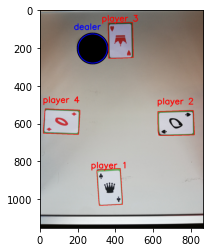

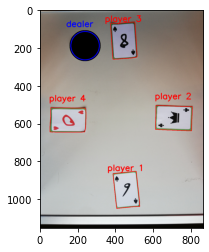

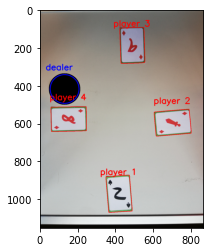

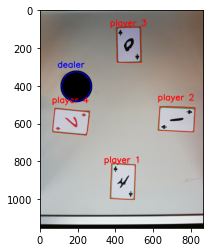

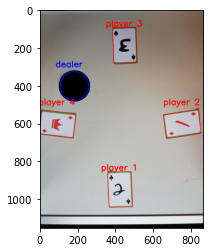

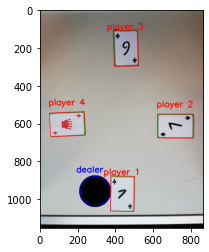

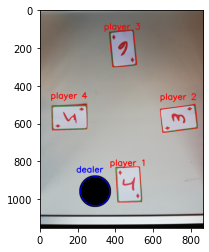

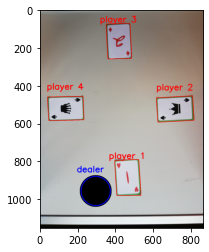

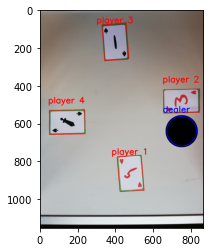

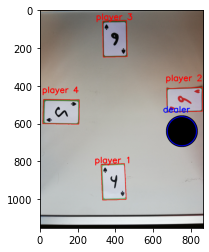

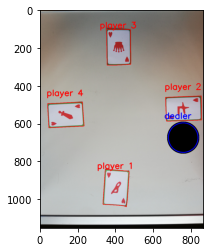

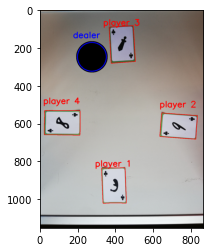

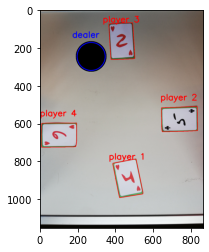

after labeled_mask
Computed dealer prediction:
[3. 3. 4. 4. 4. 1. 1. 1. 2. 2. 2. 3. 3.]
Card predictions
    P1  P2  P3  P4
0   QC  0S  KH  0D
1   9S  KC  8S  0H
2   2S  JD  9D  8D
3   4C  1C  0C  7D
4   2C  1D  3S  KD
5   7C  7S  6C  QD
6   4D  3D  6D  5D
7   1H  KS  2D  QS
8   5H  3H  1S  JS
9   4S  9H  6S  5S
10  8H  7H  QH  JH
11  3C  9C  JC  8C
12  4H  5C  5H  6H
Score Standard rules: [0 4 4 5]
Score Advanced rules: [4 2 4 3]


In [11]:
#######################################################################################################################    
# TESTING    
#######################################################################################################################
nb_players = 4
nb_rounds = 13

# load the game as resized dataset
pdf_club, pdf_diamond, pdf_heart, pdf_spade = load_suit_models(True)
pdf_jack, pdf_queen, pdf_king = load_JQK_models(False)

# load the data from 'test_game'
test_game = load_test_data()

# compute the labeled mask
output_labeled_mask, dealer_centers, game_resized = get_labeled_mask(test_game, plot=False, cherry_pick=None,display_overlay = True)

print("after labeled_mask")
# attribute the dealer
sz_x, sz_y = test_game[0].shape[0:2]
delta = 100 # distance from the boundary
expected_dealer_ctr = np.array([[sz_x-delta, sz_y//2],[sz_x//2, sz_y - delta], [delta, sz_y//2], [sz_x//2, delta]])
pred_dealer = np.zeros(nb_rounds)
for i, d in enumerate(dealer_centers):
    direction = expected_dealer_ctr - d
    dist = np.linalg.norm(direction, axis=1)
    p = np.argmin(dist) + 1
    pred_dealer[i] = p
    
print("Computed dealer prediction:")
print(pred_dealer)
nb_players = 4
nb_rounds = 13
nb_games = 1
g_idx = 7 # this will save as game8

def get_test_cards(cards, test_game):
    
    for i in range(test_game.shape[0]):
        labeled_mask = output_labeled_mask[i]
        player_pos, player_orient = extract_orientation(labeled_mask)
        img = game_resized[i]
        cards[i*4:(i+1)*4] = extract_card(img, player_pos, player_orient, do_plots = False)
    return cards

def get_all_suits(all_suits, nb_rounds, nb_players, g_idx=0):
    
    for r in range(nb_rounds):
            for p in range(nb_players):
                suit = cv.imread("suits/game_"+str(1+g_idx)+"_round_"+str(r+1)+"_player_"+str(p+1)+".png")
                all_suits[r,p] = suit
    return all_suits


cards = np.empty((nb_players*nb_rounds,290,230,3))
all_suits = np.empty((13,4,45,30,3),dtype=np.uint8)

cards = get_test_cards(cards, test_game)                   
extract_test_data(cards, nb_rounds, nb_players, g_idx)
all_suits = get_all_suits(all_suits, nb_rounds, nb_players, g_idx)

    
modelDig = LeNet5_like()
modelDig.fc3 = nn.Linear(84, 11)
modelDig.load_state_dict(torch.load("saved_models/modExtendedV2.pkl"))

modelSuit = LeNet5_like()
modelSuit.fc1 = nn.Linear(16*5*5, 60)
modelSuit.fc2 = nn.Linear(60, 20)
modelSuit.fc3 = nn.Linear(20, 2)

modelSuit.load_state_dict(torch.load("saved_models/modExtSuits.pkl"))


loader = Loader("./train_games/")

examImg = loader.getExam()

pred = modelDig.predict(examImg)
pred_val = np.empty((nb_rounds, nb_players), dtype='S2')



for r in range(nb_rounds):
    for p in range(nb_players):
        if int(pred[r,p]) == 10:
            img_path = "numbers/game_8_round_"+str(r+1)+'_player_'+str(p+1)+'.png'
            number_image = cv.imread(img_path)
            #print("number image", number_image.shape)
            value = infer_number(number_image, pdf_jack, pdf_queen, pdf_king)
            pred_val[r,p] = value # replace the predicted value
        else:
            pred_val[r,p] = str(pred[r,p]) # convert to string
            

# retrieve the predicted suits
pred_suits = infer_suit(all_suits, pdf_club, pdf_diamond, pdf_heart, pdf_spade, False, modelSuit)

# merge suits and values
prediction = pd.DataFrame(columns=['P1','P2','P3','P4'])

for r in range(nb_rounds):
    cards = []
    for p in range(nb_players):
        cards.append((pred_val[r,p]).decode("utf-8") + pred_suits[r,p].decode("utf-8"))
    prediction.loc[r] = cards
    
# print the result   
print("Card predictions")
print(prediction)
score_std, score_adv = compute_score(prediction, pred_dealer);

### 3.1 Example Final results

Example of output you **should** provide the day of the final exam.

In [12]:
from utils import print_results
import numpy as np

# Creates dummy predictions (toy exmaple)
"""
pred_rank = np.array(["0D"]*4*13).reshape((13, 4)) # Everyone played the "0 of spade".
pred_dealer = [1]*13                # List of players selected as dealer for each round
pred_pts_stand = [0,0,0,13]         # Player 4 won 13 points with standard rules.
pred_pts_advan = [0,0,8,7]          # Player 3 and 4 won 8 and 7 points with adv, rules respectively.
"""


print_results(
    rank_colour=prediction.values, 
    dealer=pred_dealer, 
    pts_standard=score_std,
    pts_advanced=score_adv,
)

The cards played were:
[
['QC', '0S', 'KH', '0D'], 
['9S', 'KC', '8S', '0H'], 
['2S', 'JD', '9D', '8D'], 
['4C', '1C', '0C', '7D'], 
['2C', '1D', '3S', 'KD'], 
['7C', '7S', '6C', 'QD'], 
['4D', '3D', '6D', '5D'], 
['1H', 'KS', '2D', 'QS'], 
['5H', '3H', '1S', 'JS'], 
['4S', '9H', '6S', '5S'], 
['8H', '7H', 'QH', 'JH'], 
['3C', '9C', 'JC', '8C'], 
['4H', '5C', '5H', '6H'], 
]
Players designated as dealer: [3. 3. 4. 4. 4. 1. 1. 1. 2. 2. 2. 3. 3.]
Players points (standard): [0 4 4 5]
Players points (advanced): [4 2 4 3]


### 3.2 Example Accuracy

Example of code you can use to validate the performance of your model. Be careful the day of the exam you will not have access to the ground truth of the predictions.

In [13]:
from utils import evaluate_game
import pandas as pd
#! You will need pandas libary to run the example. Please install the package using pip or conda commands !

# Load ground truth from game 1
GAME_INDEX = 7
cgt = pd.read_csv(f'train_games/game{GAME_INDEX}/game{GAME_INDEX}.csv', index_col=0)

cgt_rank = cgt[['P1', 'P2', 'P3', 'P4']].values
print(cgt_rank)
print(prediction)
# Compute accuracy of prediction
acc_standard = evaluate_game(prediction.values, cgt_rank, mode_advanced=False)
acc_advanced = evaluate_game(prediction.values, cgt_rank, mode_advanced=True)
print("Your model accuracy is: Standard={:.3f}, Advanced={:.3f}".format(acc_standard, acc_advanced))


print(f"pred wrong : {prediction.values[np.logical_not(prediction.values == cgt_rank)]}")
print(f"real       : {cgt_rank[np.logical_not(prediction.values == cgt_rank)]}")

[['QC' '0S' 'KH' '0D']
 ['9S' 'KC' '8S' '0H']
 ['2S' 'JD' '9D' '8D']
 ['4C' '1C' '0C' '7D']
 ['2C' '1D' '3S' 'KD']
 ['7C' '7S' '6C' 'QD']
 ['4D' '3D' '6D' '5D']
 ['1H' 'KS' '2D' 'QS']
 ['5H' '3H' '1S' 'JS']
 ['4S' '9H' '6S' '5S']
 ['8H' '7H' 'QH' 'JH']
 ['3C' '9C' 'JC' '8C']
 ['4H' '5C' '2H' '6H']]
    P1  P2  P3  P4
0   QC  0S  KH  0D
1   9S  KC  8S  0H
2   2S  JD  9D  8D
3   4C  1C  0C  7D
4   2C  1D  3S  KD
5   7C  7S  6C  QD
6   4D  3D  6D  5D
7   1H  KS  2D  QS
8   5H  3H  1S  JS
9   4S  9H  6S  5S
10  8H  7H  QH  JH
11  3C  9C  JC  8C
12  4H  5C  5H  6H
Your model accuracy is: Standard=0.981, Advanced=0.981
pred wrong : ['5H']
real       : ['2H']


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e2adfaa3-c41a-4106-ad5b-451ff264b2b4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>